In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
from keras import models
from keras import layers

In [10]:
network = models.Sequential()

In [11]:
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

In [12]:
network.add(layers.Dense(10, activation='softmax'))

In [13]:
network.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

In [15]:
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [16]:
from keras.utils import to_categorical

In [17]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.2573 - accuracy: 0.9260
Epoch 2/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.1032 - accuracy: 0.9696
Epoch 3/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.0678 - accuracy: 0.9800
Epoch 4/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0489 - accuracy: 0.9851
Epoch 5/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.0366 - accuracy: 0.9891


In [19]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 19us/step
test_acc: 0.9789000153541565


In [20]:
import numpy as np

In [21]:
x = np.array(12)

In [22]:
x

array(12)

In [23]:
x.ndim

0

In [24]:
x = np.array([12, 3, 6, 14])

In [25]:
x

array([12,  3,  6, 14])

In [26]:
x.ndim

1

In [27]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [28]:
digit = train_images[4]
digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [29]:
from matplotlib import pyplot as plt

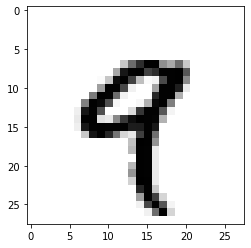

In [30]:
plt.imshow(digit, cmap = plt.cm.binary)

In [31]:
my_slice = train_images[10:100]

In [32]:
print(my_slice.shape)

(90, 28, 28)


In [33]:
my_slice = train_images[10:100, :, :]

In [34]:
my_slice.shape

(90, 28, 28)

In [35]:
my_slice = train_images[10:100, 0:28, 0:28]

In [36]:
my_slice.shape

(90, 28, 28)

In [37]:
def naive_relu(x):
    assert len(x.shape)==2
    
    x = x.copy()
    for i in range (x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j]=max(x[i, j], 0)
    return x

In [38]:
def naive_add(x, y):
    assert len(x.shape)==2
    assert x.shape==y.shape
    
    x = x.copy()
    for i in range (x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] +=y[i, j]
    return x

In [39]:
x = [[2, -3], [-3, 4]]

In [40]:
z = np.maximum(x, 0)

In [41]:
z

array([[2, 0],
       [0, 4]])

In [42]:
x = np.array([[2, 3], [3, 4]])

In [43]:
y = np.array([2,1])

In [44]:
x.shape, y.shape

((2, 2), (2,))

In [45]:
x+y

array([[4, 4],
       [5, 5]])

In [46]:
y

array([2, 1])

In [47]:
def naive_add_matrix_and_matrix_vector(x, y):
    assert len(x.shape)==2
    assert len(y.shape)==1
    assert x.shape[1]==y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [48]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

In [49]:
z = np.maximum(x, y)

In [50]:
z.shape

(64, 3, 32, 10)

In [51]:
def naive_vector_dot(x, y):
    assert len(x.shape)==1
    assert len(y.shape)==1
    assert x.shape[0] == y.shape[0]
    
    z=0
    for i in range(x.shape[0]):
        z+= (x[i]*y[i])
    return z

In [52]:
x = np.array([2, 2])
y = np.array([3, 4])

In [53]:
naive_vector_dot(x, y)

14

In [54]:
def naive_vector_dot(x, y):
    assert len(x.shape)==2
    assert len(y.shape)==1
    assert x.shape[0] == y.shape[0]
    
    z=np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z+=(x[i, j]* y[j])
    return z

In [55]:
def naive_matrix_dot(x, y):
    assert len(x.shape)==2
    assert len(y.shape)==2
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            col_y = y[:, j]
            z[i, j]+=naive_vector_dot(row_x, col_y)
    return z

In [56]:
a= np.ones((64, 32, 3, 1))

In [57]:
b = np.ones((1,))

In [58]:
c = np.dot(a, b)
c.shape

(64, 32, 3)

In [59]:
x = np.array([[0, 1], [1, 2], [2, 3]])

In [60]:
x.shape

(3, 2)

In [61]:
y = x.reshape((6, -1))
y

array([[0],
       [1],
       [1],
       [2],
       [2],
       [3]])

In [62]:
z = x.reshape((-1, 3))

In [63]:
z

array([[0, 1, 1],
       [2, 2, 3]])

In [64]:
z = np.transpose(z)

In [65]:
z

array([[0, 2],
       [1, 2],
       [1, 3]])

In [66]:
past_velocity = 0
momentum = 0.1
loss = 1

In [67]:
while loss>0.01:
    w, loss, gradient = get_current_parameters()
    velocity = past_velocity * momentum + learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)

NameError: name 'get_current_parameters' is not defined

In [68]:
from keras import layers

In [69]:
layer = layers.Dense(32, input_shape = (784,))

In [70]:
from keras import models

In [71]:
model = models.Sequential()

In [72]:
model.add(layer)

In [73]:
model.add(layers.Dense(32))

In [74]:
from keras.datasets import imdb

In [75]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [76]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [77]:
train_labels[0]

1

In [78]:
word_index = imdb.get_word_index()

In [79]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [80]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [81]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [82]:
x_train = vectorize_sequences(train_labels)
x_test = vectorize_sequences(test_data)

In [83]:
x_train[0]

array([0., 1., 0., ..., 0., 0., 0.])

In [84]:
y_train = np.asarray(train_labels).astype('float32')

In [85]:
y_test = np.asarray(test_labels).astype('float32')

In [86]:
model = models.Sequential()

In [87]:
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))

In [88]:
model.add(layers.Dense(16, activation = 'relu'))

In [89]:
model.add(layers.Dense(1, activation = 'sigmoid'))

In [90]:
#model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metric = ['acc'])

In [91]:
from keras import optimizers, losses, metrics

In [92]:
model.compile(optimizer = optimizers.RMSprop(lr = 0.001), loss = losses.binary_crossentropy, metrics = [metrics.accuracy])

In [93]:
x_val = x_train[:10000]

In [94]:
partial_x_train = x_train[10000:]

In [95]:
y_val = y_train[:10000]

In [96]:
partial_y_train = y_train[10000:]

In [97]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.6695 - accuracy: 0.0000e+00 - val_loss: 0.6458 - val_accuracy: 0.0000e+00
Epoch 2/20
15000/15000 [==============================] - 1s 59us/step - loss: 0.6196 - accuracy: 0.0000e+00 - val_loss: 0.5871 - val_accuracy: 0.0000e+00
Epoch 3/20
15000/15000 [==============================] - 1s 57us/step - loss: 0.5519 - accuracy: 0.0000e+00 - val_loss: 0.5100 - val_accuracy: 0.0000e+00
Epoch 4/20
15000/15000 [==============================] - 1s 58us/step - loss: 0.4680 - accuracy: 0.0000e+00 - val_loss: 0.4202 - val_accuracy: 0.0000e+00
Epoch 5/20
15000/15000 [==============================] - 1s 60us/step - loss: 0.3755 - accuracy: 0.0000e+00 - val_loss: 0.3265 - val_accuracy: 0.0000e+00
Epoch 6/20
15000/15000 [==============================] - 1s 61us/step - loss: 0.2832 - accuracy: 0.0000e+00 - val_loss: 0.2379 - val_accuracy: 0.0000e+00
Epoch 7/20
15000/150

In [98]:
history_dict = history.history

In [99]:
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [100]:
loss_values = history_dict['loss']

In [101]:
val_loss_values = history_dict['val_loss']

In [102]:
epochs = range(1, len(history_dict['accuracy'])+1)

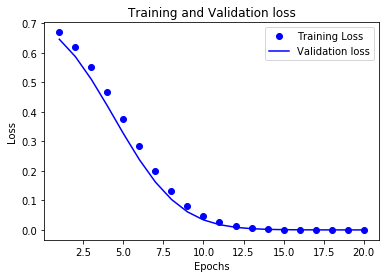

In [103]:
plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [104]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

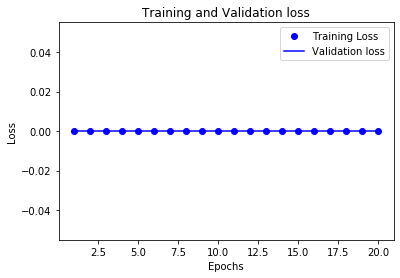

In [105]:
plt.plot(epochs, acc_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [106]:
model = models.Sequential()

In [107]:
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [108]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [109]:
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

Epoch 1/4
25000/25000 [==============================] - 1s 40us/step - loss: 0.5933 - accuracy: 0.9894
Epoch 2/4
25000/25000 [==============================] - 1s 37us/step - loss: 0.3975 - accuracy: 1.0000
Epoch 3/4
25000/25000 [==============================] - 1s 37us/step - loss: 0.2105 - accuracy: 1.0000
Epoch 4/4
25000/25000 [==============================] - 1s 38us/step - loss: 0.0875 - accuracy: 1.0000


In [110]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 39us/step


In [111]:
results

[1.0800647760391235, 0.4983600080013275]

In [112]:
model.predict(x_test)

array([[0.9234834 ],
       [0.76389575],
       [0.7735681 ],
       ...,
       [0.90274316],
       [0.84771305],
       [0.86528146]], dtype=float32)

In [113]:
from  keras.datasets import reuters

In [114]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [115]:
len(train_data)

8982

In [116]:
len(train_data[23])

29

In [117]:
train_data.shape

(8982,)

In [118]:
test_data.shape

(2246,)

In [119]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [120]:
from keras.utils.np_utils import to_categorical

In [121]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [122]:
one_hot_train_labels = to_categorical(train_labels)

In [123]:
one_hot_test_labels = to_categorical(test_labels)

In [124]:
one_hot_test_labels.shape

(2246, 46)

In [125]:
x_test.shape

(2246, 10000)

In [126]:
one_hot_train_labels.shape

(8982, 46)

In [127]:
x_train.shape

(8982, 10000)

In [128]:
model = models.Sequential()

In [129]:
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))

In [130]:
model.add(layers.Dense(64, activation = 'relu'))

In [131]:
model.add(layers.Dense(46, activation = 'softmax'))

In [132]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [133]:
x_val = x_train[:1000]

In [134]:
partial_x_train = x_train[1000:]

In [135]:
y_val = one_hot_train_labels[:1000]

In [136]:
partial_y_train = one_hot_train_labels[1000:]

In [137]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 69us/step - loss: 2.7251 - accuracy: 0.5108 - val_loss: 1.8312 - val_accuracy: 0.5990
Epoch 2/20
7982/7982 [==============================] - 0s 52us/step - loss: 1.5037 - accuracy: 0.6795 - val_loss: 1.3778 - val_accuracy: 0.7070
Epoch 3/20
7982/7982 [==============================] - 0s 52us/step - loss: 1.1012 - accuracy: 0.7699 - val_loss: 1.1614 - val_accuracy: 0.7400
Epoch 4/20
7982/7982 [==============================] - 0s 52us/step - loss: 0.8653 - accuracy: 0.8183 - val_loss: 1.0528 - val_accuracy: 0.7800
Epoch 5/20
7982/7982 [==============================] - 0s 51us/step - loss: 0.6861 - accuracy: 0.8571 - val_loss: 0.9849 - val_accuracy: 0.7950
Epoch 6/20
7982/7982 [==============================] - 0s 52us/step - loss: 0.5502 - accuracy: 0.8866 - val_loss: 0.9554 - val_accuracy: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 67us/step - loss: 0.446

In [138]:
loss = history.history['loss']

In [139]:
val_loss = history.history['val_loss']

In [140]:
epochs = range(1, len(loss)+1)

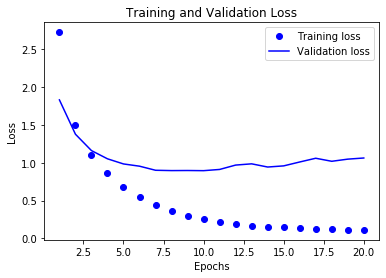

In [141]:
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [142]:
acc= history.history['accuracy']

In [143]:
val_acc = history.history['val_accuracy']

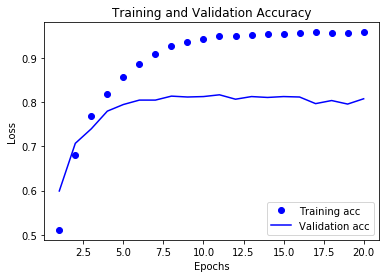

In [144]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [145]:
model = models.Sequential()

In [146]:
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))

In [147]:
model.add(layers.Dense(64, activation = 'relu'))

In [148]:
model.add(layers.Dense(46, activation = 'softmax'))

In [149]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [150]:
history = model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 512, validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 0s 59us/step - loss: 2.6033 - accuracy: 0.5372 - val_loss: 1.6607 - val_accuracy: 0.6540
Epoch 2/9
7982/7982 [==============================] - 0s 48us/step - loss: 1.3710 - accuracy: 0.7136 - val_loss: 1.2742 - val_accuracy: 0.7130
Epoch 3/9
7982/7982 [==============================] - 0s 48us/step - loss: 1.0183 - accuracy: 0.7843 - val_loss: 1.1090 - val_accuracy: 0.7540
Epoch 4/9
7982/7982 [==============================] - 0s 48us/step - loss: 0.8004 - accuracy: 0.8295 - val_loss: 1.0018 - val_accuracy: 0.7820
Epoch 5/9
7982/7982 [==============================] - 0s 48us/step - loss: 0.6318 - accuracy: 0.8687 - val_loss: 0.9589 - val_accuracy: 0.7890
Epoch 6/9
7982/7982 [==============================] - 0s 47us/step - loss: 0.5007 - accuracy: 0.8956 - val_loss: 0.8890 - val_accuracy: 0.8170
Epoch 7/9
7982/7982 [==============================] - 0s 48us/step - loss: 0.4000 - acc

In [151]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 59us/step


In [152]:
results

[0.9766989826413, 0.7871772050857544]

In [153]:
predict = model.predict(x_test)

In [154]:
predict[0].shape

(46,)

In [155]:
np.sum(predict[0])

1.0000001

In [156]:
np.argmax(predict[0])

3

In [157]:
from keras.datasets import boston_housing

In [158]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [159]:
train_data.shape

(404, 13)

In [160]:
test_data.shape

(102, 13)

In [161]:
train_labels

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [162]:
mean = train_data.mean(axis = 0)

In [163]:
train_data-=mean

In [164]:
std = train_data.std(axis = 0)

In [165]:
train_data/=std

In [166]:
test_data-=mean
test_data/=std

In [167]:
def  build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['accuracy'])
    return model

In [168]:
k = 4

In [169]:
num_val_samples = len(train_data)//k

In [170]:
num_epochs = 100

In [171]:
all_scores = []

In [172]:
for i in range(k):
    print('preprocessing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1)* num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_labels[:i * num_val_samples], train_labels[(i+1)* num_val_samples:]], axis = 0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

preprocessing fold # 0
preprocessing fold # 1
preprocessing fold # 2
preprocessing fold # 3


In [173]:
all_scores

[0.019801979884505272, 0.0, 0.009900989942252636, 0.019801979884505272]

In [174]:
np.mean(all_scores)

0.012376237427815795

In [178]:
num_epochs = 500

In [179]:
all_mae_histories = []

In [180]:
for i in range(k):
    print('preprocessing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1)* num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_labels[:i * num_val_samples], train_labels[(i+1)* num_val_samples:]], axis = 0)
    
    model = build_model()
    history =  model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 0)
    mae_history = history.history['loss']
    all_mae_histories.append(mae_history)
    

preprocessing fold # 0
preprocessing fold # 1
preprocessing fold # 2
preprocessing fold # 3


In [181]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [182]:
plt.plot(range(1, len(average_mae)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

NameError: name 'average_mae' is not defined